# Typhoon Haiyan Data Exploration and Preparation

In [27]:
%pylab inline
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn import svm
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.grid_search import GridSearchCV
from sklearn.grid_search import RandomizedSearchCV
from sklearn import cross_validation
from sklearn.cross_validation import  cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import  RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from pandas.tools.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
import StringIO, pydotplus

from IPython.display import Image  


Populating the interactive namespace from numpy and matplotlib


### Loading data

In [28]:
H = pd.read_excel("./data/20160623_Haiyan_Overview.xlsx")

In [29]:
H.columns

Index([u'OBJECTID', u'ISO', u'P_Code', u'M_Code', u'Municipality',
       u'Area (km2)', u'Avg. Elevation (m)', u'Perimeter (m)',
       u'Coastline Length (m)', u'C/P Ratio',
       u'Distance to coastline (m, mean)', u'Distance to coastline (m, stdev)',
       u'Ruggedness index (mean)', u'Ruggedness index (stdev)',
       u'Slope (mean)', u'Slope (stdev)', u'Landuse (Most common)',
       u'Population 2010 census', u'Population 2013 est.',
       u'Pop. Density 2010 per km2', u'Poverty (%)', u'Avg. Windspeed (km/h)',
       u'Distance from typhoon path (km)', u'Area Flooded (%)', u'Rainfallme',
       u'Surge Height int. (m)', u'Surge risk class (REACH)',
       u'People affected', u'People affected (% 2010)', u'Deaths',
       u'Houses damaged (REACH)', u'Houses damaged (% Shelter Cluster)',
       u'Emergency shelter (% planned & reached Shelter Cluster)',
       u'Support to Self Recovery (% planned & reached Shelter Cluster)',
       u'OCHA CCCM', u'OCHA Education', u'OCHA Early

In [30]:
H.describe()

,OBJECTID,Area (km2),Avg. Elevation (m),Perimeter (m),Coastline Length (m),C/P Ratio,"Distance to coastline (m, mean)","Distance to coastline (m, stdev)",Ruggedness index (mean),Ruggedness index (stdev),...,Houses damaged (% Shelter Cluster),Emergency shelter (% planned & reached Shelter Cluster),Support to Self Recovery (% planned & reached Shelter Cluster),OCHA CCCM,OCHA Education,OCHA Early Recovery & Livelyhoods,OCHA Food security and Agriculture,OCHA Nutrition,OCHA Protection,OCHA WASH
count,668.000000,668.000000,668.000000,668.000000,538.000000,538.000000,668.000000,668.000000,668.000000,668.000000,...,438.000000,480.000000,480.000000,217.000000,103.000000,96.000000,219.000000,82.000000,120.000000,101.000000
mean,788.239521,162.605304,172.422723,72998.526072,21207.747937,0.305093,6851.020008,3000.927118,38.679557,28.003899,...,32.591324,23.504167,10.479167,23143.571429,5739.349515,1728.822917,63794.396339,8156.939024,942.666667,66529.196040
std,462.641127,187.929418,143.400904,60550.456252,25394.282520,0.200875,6159.965384,1812.473031,19.994503,12.787995,...,39.990898,81.266257,45.801008,16584.751629,10083.004985,2606.211261,114763.686108,12293.939614,2027.377253,114939.517849
min,3.000000,7.124600,3.653769,17587.515000,154.110000,0.000000,155.732039,121.528284,3.556218,1.748513,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,336.750000,63.571575,68.862441,42570.188500,NaN,NaN,2613.671997,1681.028313,24.167912,19.803672,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,753.500000,113.206050,128.689500,60143.054500,NaN,NaN,4637.454876,2657.599623,36.362904,27.330616,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1154.250000,199.385825,243.922899,86427.579750,NaN,NaN,9401.220724,3848.262425,50.988138,35.941302,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1532.000000,2378.325000,957.472071,895871.882000,399839.760000,1.000000,38218.674073,10320.784478,109.707389,73.275270,...,149.000000,1184.000000,721.000000,68803.000000,47291.000000,15725.000000,844314.500000,57645.000000,15334.000000,950433.000000


In [31]:
H[[u'OBJECTID', u'ISO', u'P_Code', u'M_Code', u'Municipality',
       u'Area (km2)', u'Avg. Elevation (m)', u'Perimeter (m)',
       u'Coastline Length (m)', u'C/P Ratio',
       u'Distance to coastline (m, mean)', u'Distance to coastline (m, stdev)',
       u'Ruggedness index (mean)', u'Ruggedness index (stdev)',
       u'Slope (mean)', u'Slope (stdev)', u'Landuse (Most common)',
       u'Population 2010 census', u'Population 2013 est.',
       u'Pop. Density 2010 per km2', u'Poverty (%)', u'Avg. Windspeed (km/h)',
       u'Distance from typhoon path (km)', u'Area Flooded (%)',
       u'Rainfallme', u'Surge Height int. (m)', u'Surge risk class (REACH)',
       u'People affected', u'People affected (% 2010)', u'Deaths',
       u'Houses damaged (REACH)', u'Houses damaged (% Shelter Cluster)']].describe()

,OBJECTID,Area (km2),Avg. Elevation (m),Perimeter (m),Coastline Length (m),C/P Ratio,"Distance to coastline (m, mean)","Distance to coastline (m, stdev)",Ruggedness index (mean),Ruggedness index (stdev),...,Avg. Windspeed (km/h),Distance from typhoon path (km),Area Flooded (%),Rainfallme,Surge Height int. (m),People affected,People affected (% 2010),Deaths,Houses damaged (REACH),Houses damaged (% Shelter Cluster)
count,668.000000,668.000000,668.000000,668.000000,538.000000,538.000000,668.000000,668.000000,668.000000,668.000000,...,668.000000,668.000000,21.000000,668.000000,630.000000,668.000000,668.000000,668.000000,335.000000,438.000000
mean,788.239521,162.605304,172.422723,72998.526072,21207.747937,0.305093,6851.020008,3000.927118,38.679557,28.003899,...,83.944611,122.931326,2.986667,431.058160,2.543041,14606.577844,38.198873,8.203593,1729.298507,32.591324
std,462.641127,187.929418,143.400904,60550.456252,25394.282520,0.200875,6159.965384,1812.473031,19.994503,12.787995,...,50.840182,75.550099,5.827203,174.157568,0.723284,28077.955099,42.159752,100.325589,2897.909955,39.990898
min,3.000000,7.124600,3.653769,17587.515000,154.110000,0.000000,155.732039,121.528284,3.556218,1.748513,...,40.000000,0.000000,0.000000,93.926712,1.203800,0.000000,0.000000,0.000000,1.000000,0.000000
25%,336.750000,63.571575,68.862441,42570.188500,NaN,NaN,2613.671997,1681.028313,24.167912,19.803672,...,42.000000,59.891500,NaN,310.977131,NaN,383.250000,1.237778,0.000000,NaN,NaN
50%,753.500000,113.206050,128.689500,60143.054500,NaN,NaN,4637.454876,2657.599623,36.362904,27.330616,...,60.000000,117.404000,NaN,419.000000,NaN,5525.500000,13.700872,0.000000,NaN,NaN
75%,1154.250000,199.385825,243.922899,86427.579750,NaN,NaN,9401.220724,3848.262425,50.988138,35.941302,...,107.000000,183.050250,NaN,511.127100,NaN,18384.250000,69.999329,0.000000,NaN,NaN
max,1532.000000,2378.325000,957.472071,895871.882000,399839.760000,1.000000,38218.674073,10320.784478,109.707389,73.275270,...,190.000000,288.438000,23.750000,1305.707354,5.058900,433086.000000,258.829631,1989.000000,15824.000000,149.000000


In [32]:
H[['People affected', 'Houses damaged (REACH)']].describe()

,People affected,Houses damaged (REACH)
count,668.000000,335.000000
mean,14606.577844,1729.298507
std,28077.955099,2897.909955
min,0.000000,1.000000
25%,383.250000,NaN
50%,5525.500000,NaN
75%,18384.250000,NaN
max,433086.000000,15824.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111d84690>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x111fd71d0>]], dtype=object)

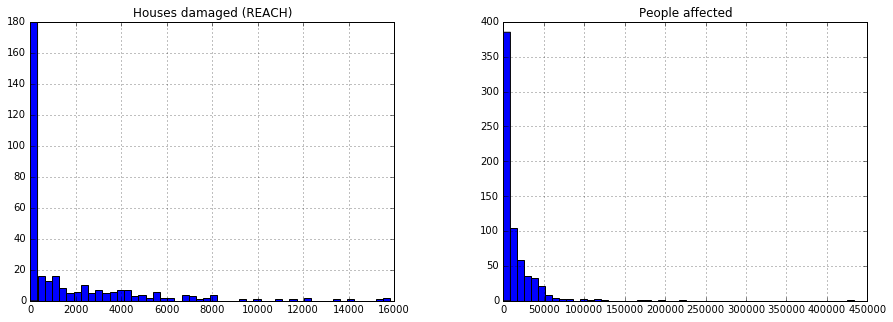

In [33]:
H[[ 'Houses damaged (REACH)', 'People affected']].hist(figsize=(15,5), bins=50)

/Users/Krysia/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x113053950>],
 'caps': [<matplotlib.lines.Line2D at 0x11305e890>,
 'fliers': [<matplotlib.lines.Line2D at 0x113068b90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x113068550>],
 'whiskers': [<matplotlib.lines.Line2D at 0x113053b50>,
  <matplotlib.lines.Line2D at 0x11305e250>]}

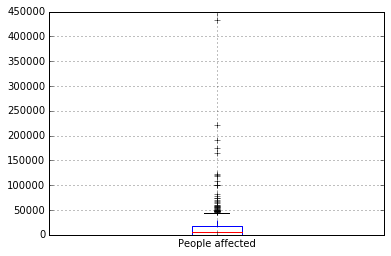

In [34]:
H[['People affected']].boxplot(figsize=(15,5))

/Users/Krysia/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x113178590>],
 'caps': [<matplotlib.lines.Line2D at 0x1131854d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1131907d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x113190190>],
 'whiskers': [<matplotlib.lines.Line2D at 0x113178790>,
  <matplotlib.lines.Line2D at 0x113178e50>]}

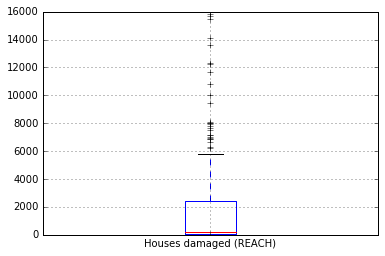

In [35]:
H[['Houses damaged (REACH)']].boxplot()

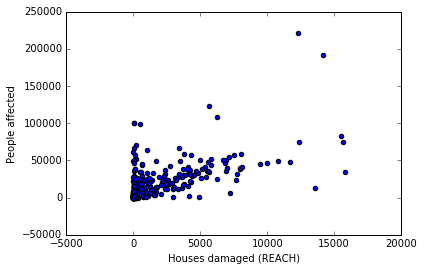

In [36]:
H.plot.scatter(y= 'People affected', x = 'Houses damaged (REACH)')

## Missing values

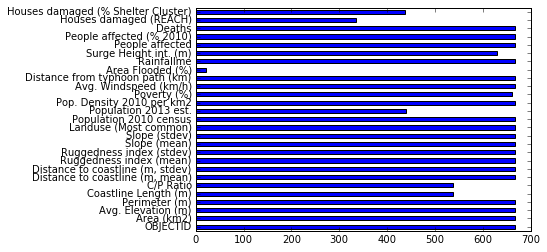

In [37]:
H[[u'OBJECTID', u'ISO', u'P_Code', u'M_Code', u'Municipality',
       u'Area (km2)', u'Avg. Elevation (m)', u'Perimeter (m)',
       u'Coastline Length (m)', u'C/P Ratio',
       u'Distance to coastline (m, mean)', u'Distance to coastline (m, stdev)',
       u'Ruggedness index (mean)', u'Ruggedness index (stdev)',
       u'Slope (mean)', u'Slope (stdev)', u'Landuse (Most common)',
       u'Population 2010 census', u'Population 2013 est.',
       u'Pop. Density 2010 per km2', u'Poverty (%)', u'Avg. Windspeed (km/h)',
       u'Distance from typhoon path (km)', u'Area Flooded (%)',
       u'Rainfallme', u'Surge Height int. (m)', u'Surge risk class (REACH)',
       u'People affected', u'People affected (% 2010)', u'Deaths',
       u'Houses damaged (REACH)', u'Houses damaged (% Shelter Cluster)']][pd.notnull(H['People affected'])].describe().transpose()['count'].plot(kind='barh')

### 1. Population 2013 est.   

Imputing missing values:  'Population 2013 Filled' =  Population 2010 + g* Population_2010

/Users/Krysia/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  app.launch_new_instance()


{'boxes': [<matplotlib.lines.Line2D at 0x114058890>],
 'caps': [<matplotlib.lines.Line2D at 0x1140647d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x11406fad0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11406f490>],
 'whiskers': [<matplotlib.lines.Line2D at 0x114058a90>,
  <matplotlib.lines.Line2D at 0x114064190>]}

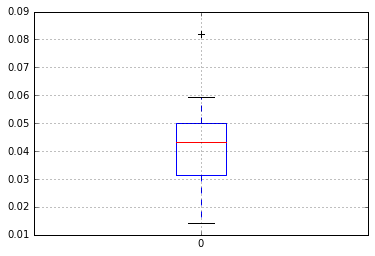

In [38]:
pop = H[['Population 2010 census', 'Population 2013 est.']].dropna()
g = pd.DataFrame((pop['Population 2013 est.'] - pop['Population 2010 census'])/pop['Population 2010 census'])
g.boxplot()

In [39]:
print g.mean()
g.describe()



0    0.042249
dtype: float64


,0
count,440.000000
mean,0.042249
std,0.012870
min,0.014149
25%,0.031519
50%,0.043359
75%,0.050011
max,0.081975


In [40]:
estimate = pd.DataFrame()

In [41]:
estimate['Population 2013'] = H['Population 2010 census'] + H['Population 2010 census'].apply(lambda x: x*  g.mean())[0]

In [42]:
H['Population 2013 Filled'] = H['Population 2013 est.'].fillna(estimate['Population 2013'])
H['Pop. Density 2013 per km2'] = H['Population 2013 Filled'] / H['Area (km2)']
H['Affected density'] = H['People affected'] / H['Area (km2)']


In [43]:
estimate.describe()

,Population 2013
count,668.000000
mean,45759.187241
std,58519.183053
min,4229.448034
25%,19216.994294
50%,31674.480155
75%,52237.018414
max,902766.198324


#### Deleting 'Population 2010 census', 'Population 2013 est.',  'Pop. Density 2010 per km2' 
#### Leaving only 'Population 2013 Filled', 'Pop. Density 2013 per km2'

In [44]:
del H['Population 2010 census']
del H['Population 2013 est.']
del H ['Pop. Density 2010 per km2']

In [45]:
H.describe()

,OBJECTID,Area (km2),Avg. Elevation (m),Perimeter (m),Coastline Length (m),C/P Ratio,"Distance to coastline (m, mean)","Distance to coastline (m, stdev)",Ruggedness index (mean),Ruggedness index (stdev),...,OCHA CCCM,OCHA Education,OCHA Early Recovery & Livelyhoods,OCHA Food security and Agriculture,OCHA Nutrition,OCHA Protection,OCHA WASH,Population 2013 Filled,Pop. Density 2013 per km2,Affected density
count,668.000000,668.000000,668.000000,668.000000,538.000000,538.000000,668.000000,668.000000,668.000000,668.000000,...,217.000000,103.000000,96.000000,219.000000,82.000000,120.000000,101.000000,668.000000,668.000000,668.000000
mean,788.239521,162.605304,172.422723,72998.526072,21207.747937,0.305093,6851.020008,3000.927118,38.679557,28.003899,...,23143.571429,5739.349515,1728.822917,63794.396339,8156.939024,942.666667,66529.196040,45827.373282,435.916619,156.748717
std,462.641127,187.929418,143.400904,60550.456252,25394.282520,0.200875,6159.965384,1812.473031,19.994503,12.787995,...,16584.751629,10083.004985,2606.211261,114763.686108,12293.939614,2027.377253,114939.517849,59078.079686,702.137564,346.031531
min,3.000000,7.124600,3.653769,17587.515000,154.110000,0.000000,155.732039,121.528284,3.556218,1.748513,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4229.448034,17.255118,0.000000
25%,336.750000,63.571575,68.862441,42570.188500,NaN,NaN,2613.671997,1681.028313,24.167912,19.803672,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19243.121825,190.620705,2.808801
50%,753.500000,113.206050,128.689500,60143.054500,NaN,NaN,4637.454876,2657.599623,36.362904,27.330616,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31851.500000,284.839192,40.250550
75%,1154.250000,199.385825,243.922899,86427.579750,NaN,NaN,9401.220724,3848.262425,50.988138,35.941302,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52249.525407,446.229037,190.696971
max,1532.000000,2378.325000,957.472071,895871.882000,399839.760000,1.000000,38218.674073,10320.784478,109.707389,73.275270,...,68803.000000,47291.000000,15725.000000,844314.500000,57645.000000,15334.000000,950433.000000,917566.000000,11174.116523,5274.116523


### 2. Poverty 
Added variable 'Poverty (%) Filled' , where cells with Nan are replaces by average

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1143ac810>]], dtype=object)

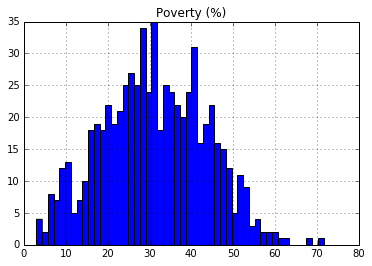

In [46]:
H[['Poverty (%)']].hist(bins=50)

In [47]:
H[['Poverty (%) Filled']] = H[['Poverty (%)']].fillna(H[['Poverty (%)']].mean())

### 3. Coastline, C/P Ratio
Replacing Coastline, C/P Ratio Nan with 0

In [48]:
H['Coastline Length (m)'].fillna(0, inplace=True)
H['C/P Ratio'].fillna(0, inplace=True)

## Modifying variables

### Mapping Surge risk 

In [49]:
H['Surge risk']  = H['Surge risk class (REACH)'].map({'inland':  0, 'low': 1, 'medium':2, 'high':3 })

### Adding new variable 'Poor' with estimated number of poor people 

In [50]:
H['Poor'] = H['Poverty (%)'] * H['Population 2013 Filled']

In [51]:
H['% Affected'] = H['People affected'] / H['Population 2013 Filled']

In [52]:
H.describe()

,OBJECTID,Area (km2),Avg. Elevation (m),Perimeter (m),Coastline Length (m),C/P Ratio,"Distance to coastline (m, mean)","Distance to coastline (m, stdev)",Ruggedness index (mean),Ruggedness index (stdev),...,OCHA Nutrition,OCHA Protection,OCHA WASH,Population 2013 Filled,Pop. Density 2013 per km2,Affected density,Poverty (%) Filled,Surge risk,Poor,% Affected
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,...,82.000000,120.000000,101.000000,668.000000,668.000000,668.000000,668.000000,657.000000,6.610000e+02,668.000000
mean,788.239521,162.605304,172.422723,72998.526072,17080.491602,0.245719,6851.020008,3000.927118,38.679557,28.003899,...,8156.939024,942.666667,66529.196040,45827.373282,435.916619,156.748717,31.151740,0.640791,1.173191e+06,0.366843
std,462.641127,187.929418,143.400904,60550.456252,24285.471310,0.217020,6159.965384,1812.473031,19.994503,12.787995,...,12293.939614,2027.377253,114939.517849,59078.079686,702.137564,346.031531,12.375899,0.789824,8.584284e+05,0.405238
min,3.000000,7.124600,3.653769,17587.515000,0.000000,0.000000,155.732039,121.528284,3.556218,1.748513,...,0.000000,0.000000,0.000000,4229.448034,17.255118,0.000000,2.990000,0.000000,1.052579e+05,0.000000
25%,336.750000,63.571575,68.862441,42570.188500,2262.692500,0.020000,2613.671997,1681.028313,24.167912,19.803672,...,NaN,NaN,NaN,19243.121825,190.620705,2.808801,22.515000,NaN,NaN,0.011872
50%,753.500000,113.206050,128.689500,60143.054500,12186.740000,0.230000,4637.454876,2657.599623,36.362904,27.330616,...,NaN,NaN,NaN,31851.500000,284.839192,40.250550,30.885000,NaN,NaN,0.131278
75%,1154.250000,199.385825,243.922899,86427.579750,22275.352500,0.380000,9401.220724,3848.262425,50.988138,35.941302,...,NaN,NaN,NaN,52249.525407,446.229037,190.696971,40.312500,NaN,NaN,0.666657
max,1532.000000,2378.325000,957.472071,895871.882000,399839.760000,1.000000,38218.674073,10320.784478,109.707389,73.275270,...,57645.000000,15334.000000,950433.000000,917566.000000,11174.116523,5274.116523,71.580000,3.000000,6.239449e+06,2.483375


### Saving results

In [53]:
H.to_csv("./data/Haiyan.csv")

### Data distribution & correlation analysis

### Surge Height

In [54]:
ws = H[[u'Avg. Windspeed (km/h)', 'Surge Height int. (m)']].dropna()
slr = LinearRegression()
slr.fit(ws[[u'Avg. Windspeed (km/h)']], ws[['Surge Height int. (m)']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [55]:
print slr.intercept_
print slr.coef_

[ 2.04477599]
[[ 0.00575458]]


In [56]:
ps = slr.predict(H[[u'Avg. Windspeed (km/h)']])

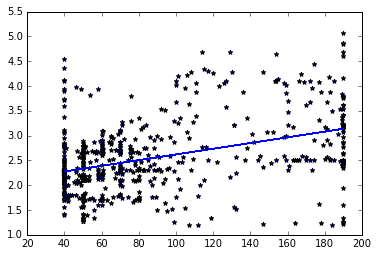

In [57]:
pyplot.plot(H[[u'Avg. Windspeed (km/h)']].values, ps)
pyplot.scatter(H[[u'Avg. Windspeed (km/h)']], H[[u'Surge Height int. (m)']], marker='*')


In [58]:
ws.describe()

,Avg. Windspeed (km/h),Surge Height int. (m)
count,630.000000,630.000000
mean,86.585714,2.543041
std,51.166440,0.723284
min,40.000000,1.203800
25%,50.000000,2.105975
50%,66.000000,2.402050
75%,111.750000,2.847650
max,190.000000,5.058900


In [91]:
H.columns

Index([                                                      u'OBJECTID',
                                                                  u'ISO',
                                                               u'P_Code',
                                                               u'M_Code',
                                                         u'Municipality',
                                                           u'Area (km2)',
                                                   u'Avg. Elevation (m)',
                                                        u'Perimeter (m)',
                                                 u'Coastline Length (m)',
                                                            u'C/P Ratio',
                                      u'Distance to coastline (m, mean)',
                                     u'Distance to coastline (m, stdev)',
                                              u'Ruggedness index (mean)',
                                      

In [92]:
subH = H[[   
         u'Area (km2)',
                                                   u'Avg. Elevation (m)',
                                                 u'Coastline Length (m)',
                                                            u'C/P Ratio',
                                      u'Distance to coastline (m, mean)',
                                     u'Distance to coastline (m, stdev)',
                                              u'Ruggedness index (mean)',
                                             u'Ruggedness index (stdev)',
                                                         u'Slope (mean)',
                                                        u'Slope (stdev)',
                                                u'Landuse (Most common)',
                                                 u'Population 2013 Filled',
                                                          u'Poverty (%)',
                                                u'Avg. Windspeed (km/h)',
                                      u'Distance from typhoon path (km)',
                                                     u'Area Flooded (%)',
                                                        u'Rainfallme',
                                                u'Surge Height int. (m)',
                                             u'Surge risk class (REACH)',
              u'Emergency shelter (% planned & reached Shelter Cluster)',
       u'Support to Self Recovery (% planned & reached Shelter Cluster)',
                                                            u'OCHA CCCM',
                                                       u'OCHA Education',
                                    u'OCHA Early Recovery & Livelyhoods',
                                   u'OCHA Food security and Agriculture',
                                                       u'OCHA Nutrition',
                                                      u'OCHA Protection',
                                                            u'OCHA WASH',
                                               u'Population 2013 Filled',
                                            u'Pop. Density 2013 per km2',
                                                              u'People affected',
                                             u'People affected (% 2010)',
                                                               u'Deaths',
                                               u'Houses damaged (REACH)',
                                   u'Houses damaged (% Shelter Cluster)',
                                                     u'Affected density',
                                                           u'% Affected']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114e47510>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11642f590>]], dtype=object)

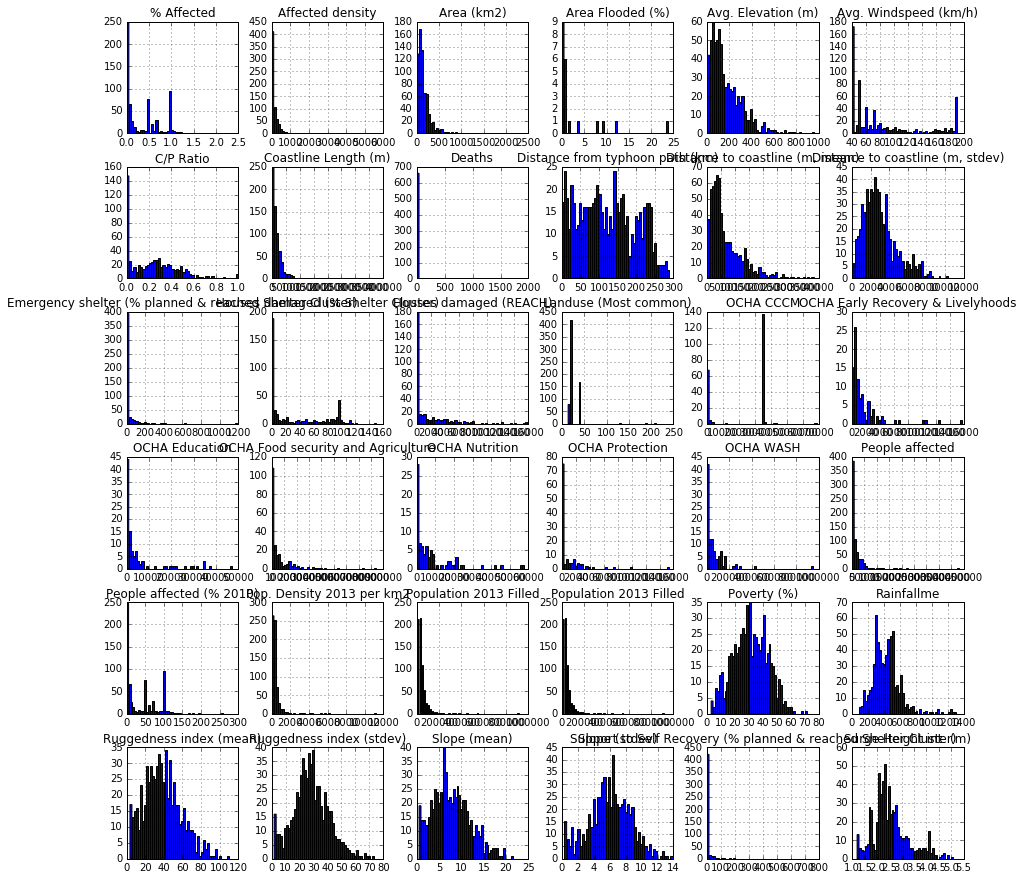

In [62]:
subH.hist(figsize=(15,15), bins=50)

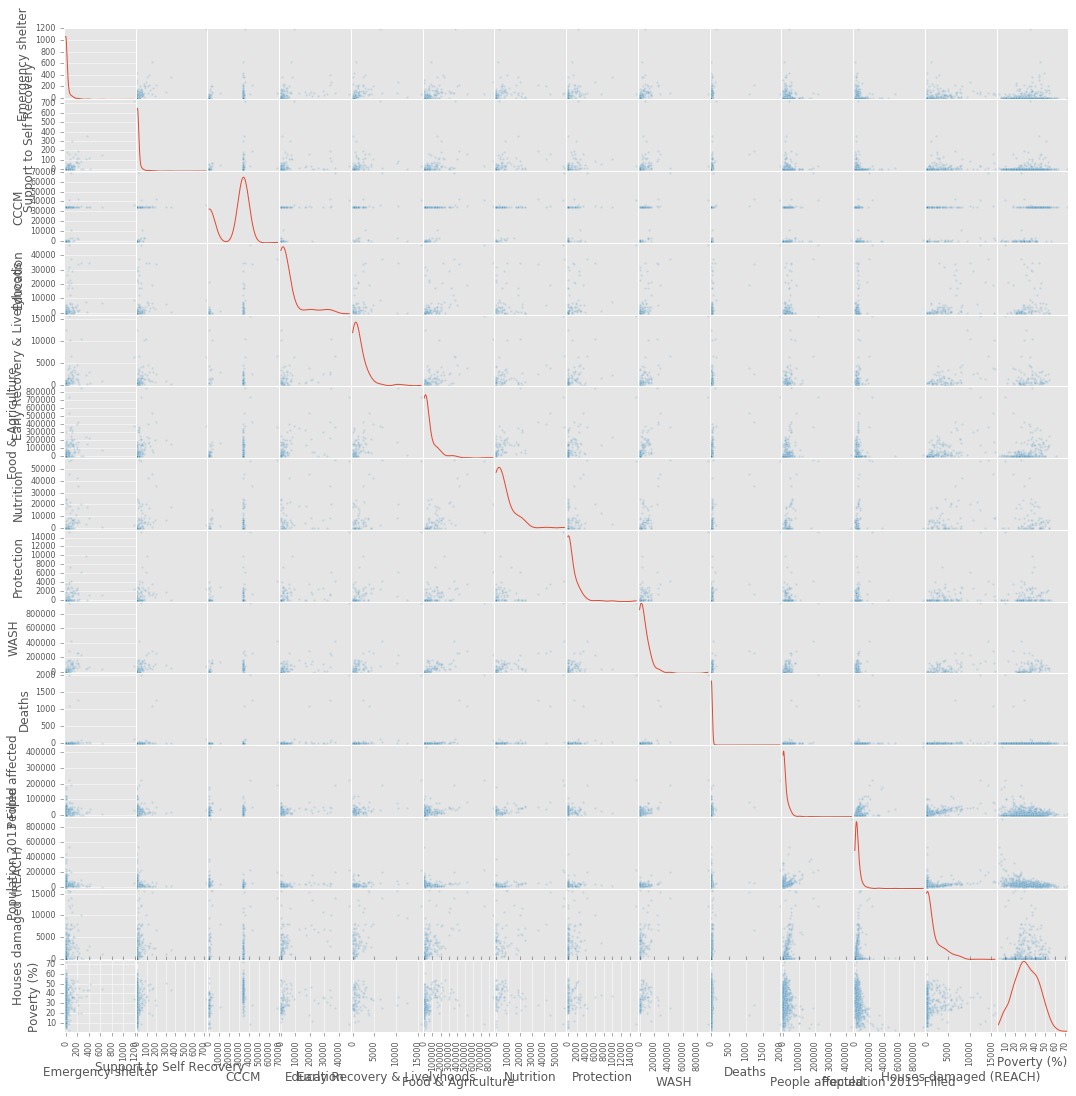

In [104]:
res = scatter_matrix(subH, alpha=0.2, figsize=(18, 18), diagonal='kde')

In [93]:
subH.columns

Index([                                                    u'Area (km2)',
                                                   u'Avg. Elevation (m)',
                                                 u'Coastline Length (m)',
                                                            u'C/P Ratio',
                                      u'Distance to coastline (m, mean)',
                                     u'Distance to coastline (m, stdev)',
                                              u'Ruggedness index (mean)',
                                             u'Ruggedness index (stdev)',
                                                         u'Slope (mean)',
                                                        u'Slope (stdev)',
                                                u'Landuse (Most common)',
                                               u'Population 2013 Filled',
                                                          u'Poverty (%)',
                                      

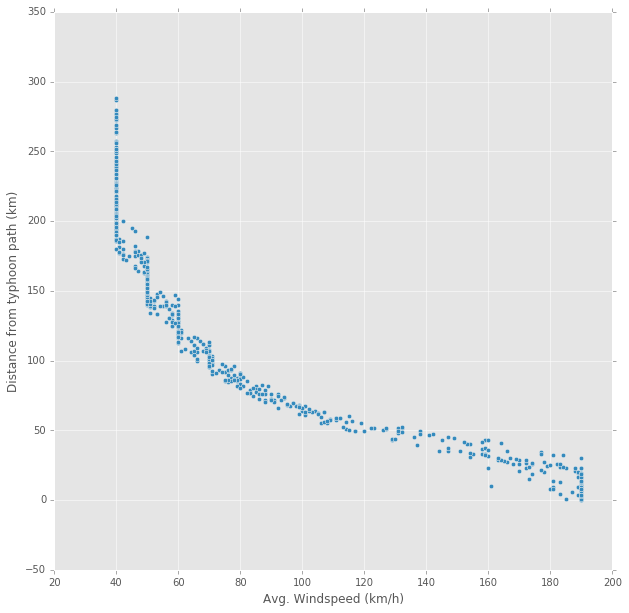

In [94]:
subH.plot.scatter(x='Avg. Windspeed (km/h)', y = 'Distance from typhoon path (km)', figsize=(10,10))

### People affected correlations

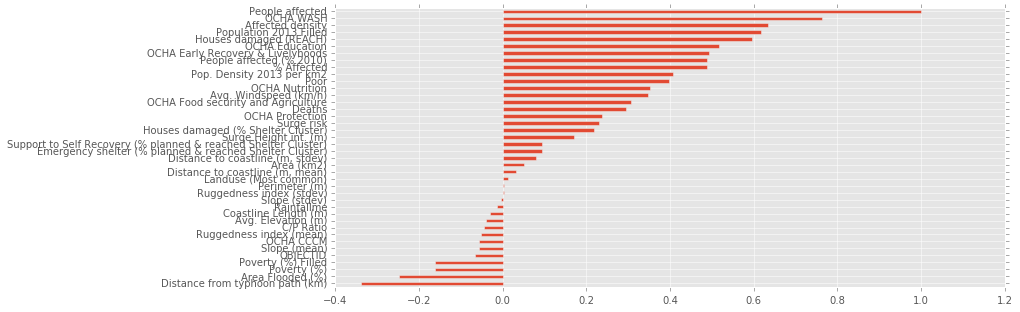

In [95]:

H.corr()['People affected'].sort_values().plot(kind='barh',  figsize=(12, 5))

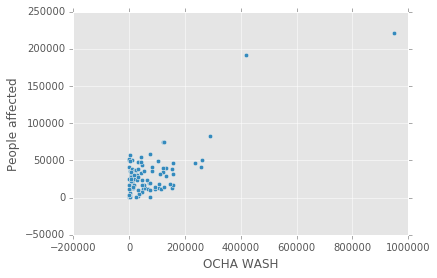

In [96]:
H.plot.scatter(x='OCHA WASH', y = 'People affected')

### Houses damaged correlations

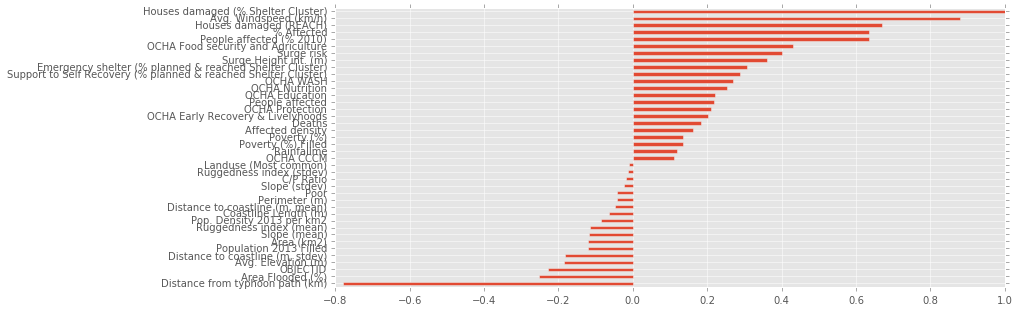

In [97]:
H.corr()['Houses damaged (% Shelter Cluster)'].sort_values().plot(kind='barh',  figsize=(12, 5))

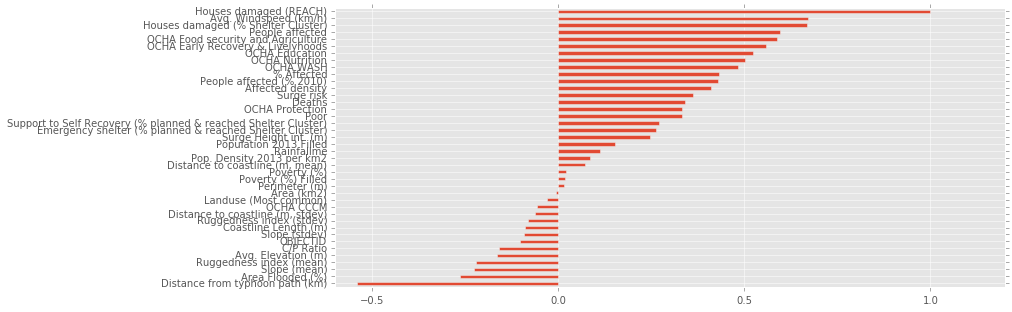

In [98]:
H.corr()['Houses damaged (REACH)'].sort_values().plot(kind='barh',  figsize=(12, 5))

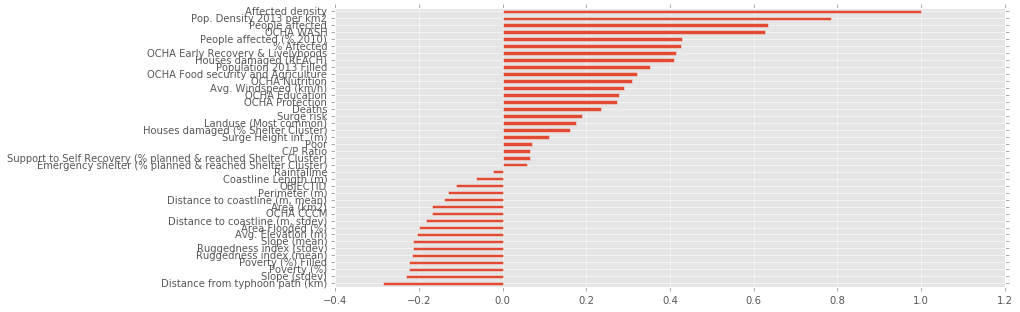

In [99]:
H.corr()['Affected density'].sort_values().plot(kind='barh',  figsize=(12, 5))

In [100]:
subH = H[[   
                              
              u'Emergency shelter (% planned & reached Shelter Cluster)',
       u'Support to Self Recovery (% planned & reached Shelter Cluster)',
                                                            u'OCHA CCCM',
                                                       u'OCHA Education',
                                    u'OCHA Early Recovery & Livelyhoods',
                                   u'OCHA Food security and Agriculture',
                                                       u'OCHA Nutrition',
                                                      u'OCHA Protection',
                                                            u'OCHA WASH',
                                                             u'Deaths',
                                                       u'People affected',
                                                u'Population 2013 Filled', 
                                               u'Houses damaged (REACH)',
                                                                  u'Poverty (%)'
     
]]

In [101]:
subH.columns = [ u'Emergency shelter',
       u'Support to Self Recovery ',
                                                            u'CCCM',
                                                       u'Education',
                                    u'Early Recovery & Livelyhoods',
                                   u'Food & Agriculture',
                                                       u'Nutrition',
                                                      u'Protection',
                                                            u'WASH',
                                                             u'Deaths',
                                                       u'People affected',
                                                u'Population 2013 Filled', 
                                               u'Houses damaged (REACH)',
                                                                  u'Poverty (%)'
               ]

### Provided Help Correlations

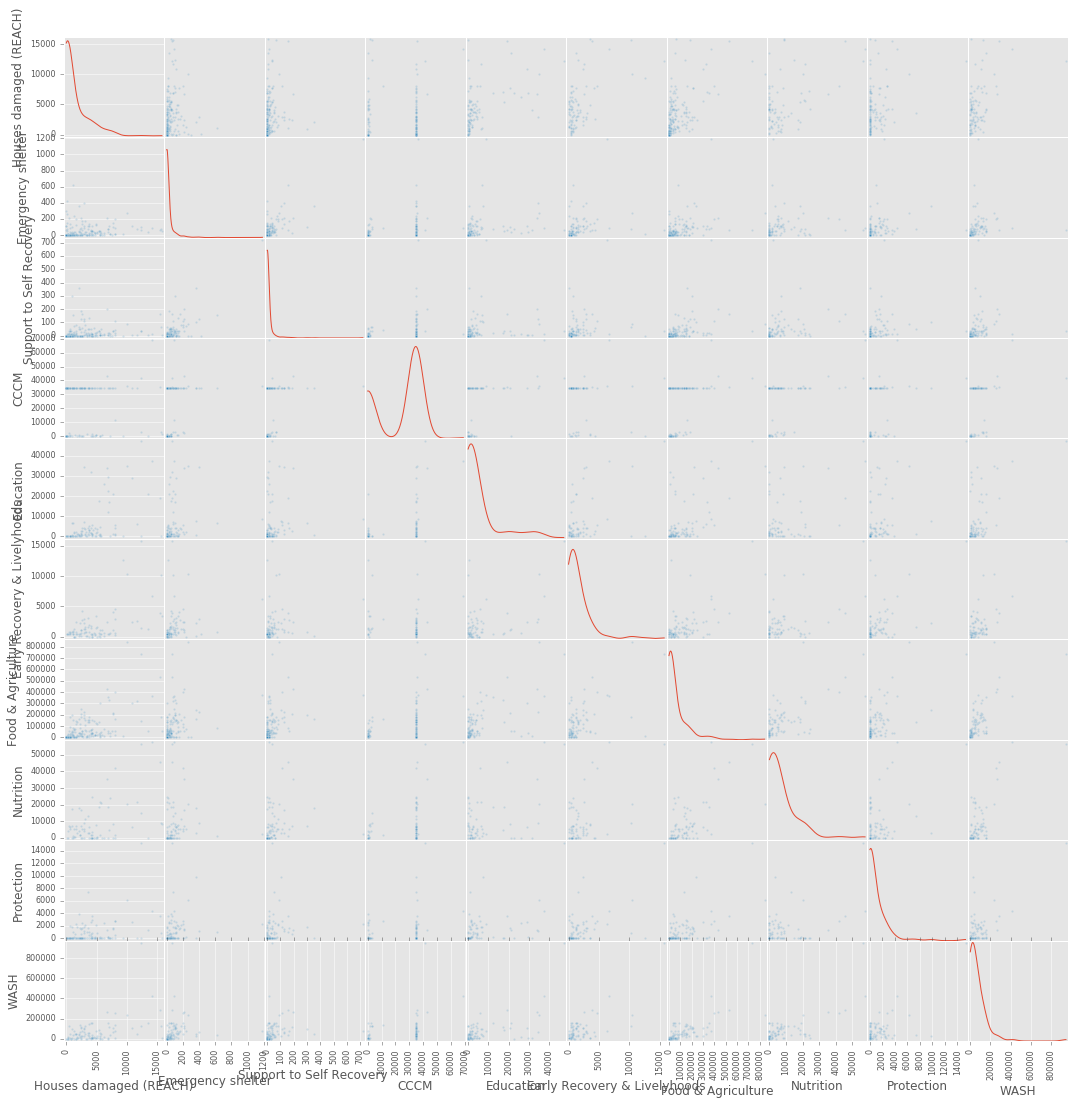

In [102]:
s = subH[ [
         u'Houses damaged (REACH)',
        u'Emergency shelter',
       u'Support to Self Recovery ',
                                                            u'CCCM',
                                                       u'Education',
                                    u'Early Recovery & Livelyhoods',
                                   u'Food & Agriculture',
                                                       u'Nutrition',
                                                      u'Protection',
                                                            u'WASH',
               ]]
res = scatter_matrix(s, alpha=0.2, figsize=(18, 18), diagonal='kde')

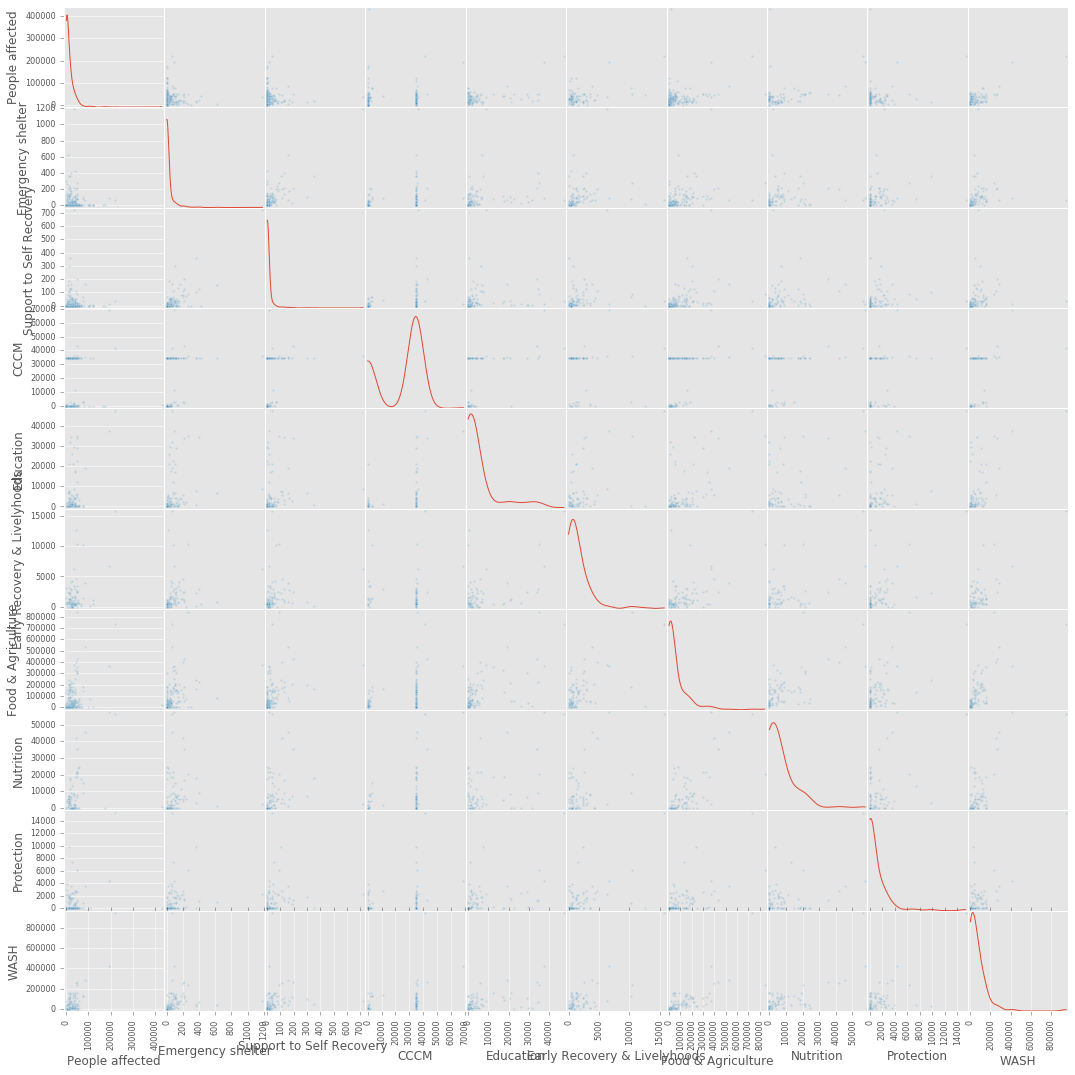

In [103]:
s = subH[ [
         u'People affected',
        u'Emergency shelter',
       u'Support to Self Recovery ',
                                                            u'CCCM',
                                                       u'Education',
                                    u'Early Recovery & Livelyhoods',
                                   u'Food & Agriculture',
                                                       u'Nutrition',
                                                      u'Protection',
                                                            u'WASH']]
res = scatter_matrix(s, alpha=0.2, figsize=(18, 18), diagonal='kde')

### Houses damaged vs Avg Windspeed vs People Affected

In [83]:
matplotlib.style.use('ggplot')


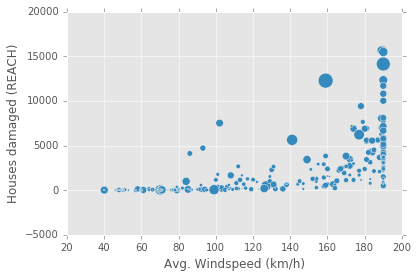

In [84]:
H.plot.scatter(y= 'Houses damaged (REACH)', x = 'Avg. Windspeed (km/h)', s=H['People affected']/1000)

### Municipalities with largest damage

In [88]:
H.sort(columns='People affected', ascending=False)[['P_Code','Municipality', u'Area (km2)', u'Avg. Elevation (m)', u'Poverty (%)',
       u'Avg. Windspeed (km/h)', u'Distance from typhoon path (km)',
       u'Area Flooded (%)', u'Surge Height int. (m)',
       u'Surge risk class (REACH)', u'People affected',
       u'People affected (% 2010)', u'Deaths', u'Houses damaged (REACH)',
       u'Houses damaged (% Shelter Cluster)']]

/Users/Krysia/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,P_Code,Municipality,Area (km2),Avg. Elevation (m),Poverty (%),Avg. Windspeed (km/h),Distance from typhoon path (km),Area Flooded (%),Surge Height int. (m),Surge risk class (REACH),People affected,People affected (% 2010),Deaths,Houses damaged (REACH),Houses damaged (% Shelter Cluster)
232,PH072200000,Cebu City,294.4329,328.903267,6.80,78,86.313,NaN,2.4024,low,433086,50.000058,0,NaN,0.0
380,PH083700000,Tacloban City,119.8973,71.466724,9.75,159,32.388,0.21,2.9822,high,221174,100.000000,1989,12270.0,121.0
371,PH083700000,Ormoc City,457.6247,315.405822,25.69,190,2.693,0.00,5.0589,medium,191200,100.000000,37,14132.0,97.0
241,PH072200000,Lapu-Lapu City,64.2528,5.466243,9.09,73,93.066,NaN,2.3162,low,175234,50.000143,1,NaN,0.0
245,PH072200000,Mandaue City,31.4100,18.830694,5.49,77,87.762,NaN,2.2594,inland,165660,50.000000,0,NaN,0.0
433,PH064500000,Cadiz City,523.0740,330.344067,24.65,141,46.530,NaN,3.0237,medium,122615,80.933993,0,5636.0,73.0
573,PH086000000,Calbayog City,908.6508,150.078080,24.85,58,125.041,NaN,1.5972,low,120945,70.000232,0,NaN,0.0
238,PH072200000,Danao City,138.9261,261.119306,16.61,101,67.173,NaN,2.1254,low,119252,100.000000,0,NaN,0.0
348,PH083700000,Baybay City,409.3806,302.794509,27.71,177,32.810,NaN,1.6183,low,108841,105.834249,2,6215.0,97.0
93,PH072200000,Talisay City,49.5562,147.614011,10.65,70,97.471,NaN,2.6312,inland,100388,50.000996,0,30.0,2.0
